## 개요
- Bike Sharing Demand 대회 데이터를 활용하여 ML 모형을 만들 수 있다. 
- MLFlow에 저장한 모델을 불러와서 예측을 할 수 있다. 
- 제출 파일을 만들어서 제출해본다. 

In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split

print(f"numpy version {np.__version__}")
print(f"pandas version {pd.__version__}")
print(f"matplotlib version {mpl.__version__}")
print(f"seaborn version {sns.__version__}")
print(f"sklearn version {sklearn.__version__}")

numpy version 1.26.1
pandas version 2.1.1
matplotlib version 3.8.0
seaborn version 0.13.0
sklearn version 1.3.1


## 데이터 불러오기
- 데이터 : https://www.kaggle.com/competitions/bike-sharing-demand

In [3]:
# 코드
DATA_PATH = 'data\\bike-sharing-demand\\'

train_df = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')
submission = pd.read_csv(DATA_PATH + 'sampleSubmission.csv')

train_df.shape, test.shape, submission.shape

((10886, 12), (6493, 9), (6493, 2))

## 탐색적 자료분석
- 일반적으로 탐색적 자료분석을 하면서, 어떤 피처를 정리할지 확인하기 때문에 분리를 하는 것이 좋음

In [4]:
# EDA의 핵심은 시각화가 아니라, 어떤 데이터를 전처리 해야 하는지 정리하는 것이다.

temp_df = train_df.copy()
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- 시각화를 위한 날짜 데이터 처리
- 연도, 월, 일자, 시간, 분, 초 등으로 구분
    + 그런데 분과 초를 구분하는 것은 시각화에 의미가 있어 보이지는 않음

In [5]:
# 
temp_df['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

- datetime의 데이터 타입은 object인데, 이를 datetime으로 변경하고, 구분하기 위해서 `date`으로 저장한다. 

In [6]:
# 
temp_df['date'] = pd.to_datetime(temp_df['datetime'])
temp_df['year'] = temp_df['date'].dt.year
temp_df['month'] = temp_df['date'].dt.month
temp_df['day'] = temp_df['date'].dt.day
temp_df['hour'] = temp_df['date'].dt.hour

temp_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01 00:00:00,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01 01:00:00,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01 02:00:00,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01 03:00:00,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01 04:00:00,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19 19:00:00,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19 20:00:00,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19 21:00:00,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19 22:00:00,2012,12,19,22


- 일반적으로 요일을 지정할 수 있다. 

In [7]:
# 

temp_df['weekday'] = temp_df['date'].dt.day_name()
temp_df['weekday'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

- 한국어 요일로 변경할 수 있다. 

In [8]:
# 
en_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
kor_weekdays = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

temp_df['kor_weekday'] = temp_df['weekday'].replace(en_weekdays, kor_weekdays)
temp_df[['weekday', 'kor_weekday']]

,weekday,kor_weekday
0,Saturday,토요일
1,Saturday,토요일
2,Saturday,토요일
3,Saturday,토요일
4,Saturday,토요일
...,...,...
10881,Wednesday,수요일
10882,Wednesday,수요일
10883,Wednesday,수요일
10884,Wednesday,수요일


- season 컬럼 1, 2, 3, 4를 spring, summer, fall, winter로 변경한다. 

In [9]:
# 
season_num = [1,2,3,4]
season_str = ['Spring', 'Summer', 'Fall', 'Winter']

temp_df['season'] = temp_df['season'].replace(season_num, season_str)
temp_df['season']

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
10881    Winter
10882    Winter
10883    Winter
10884    Winter
10885    Winter
Name: season, Length: 10886, dtype: object

In [10]:
# 
weather_num = [1,2,3,4]
weather_str = ['Clear', 'Few Clouds', 'Light Snow, Rain', 'Heavy Snow, Rain']

temp_df['weather'] = temp_df['weather'].replace(weather_num, weather_str)
temp_df['weather']

0        Clear
1        Clear
2        Clear
3        Clear
4        Clear
         ...  
10881    Clear
10882    Clear
10883    Clear
10884    Clear
10885    Clear
Name: weather, Length: 10886, dtype: object

## 데이터 시각화 
- 수치 예측하는 대회이기 때문에 종속변수를 확인한다. 

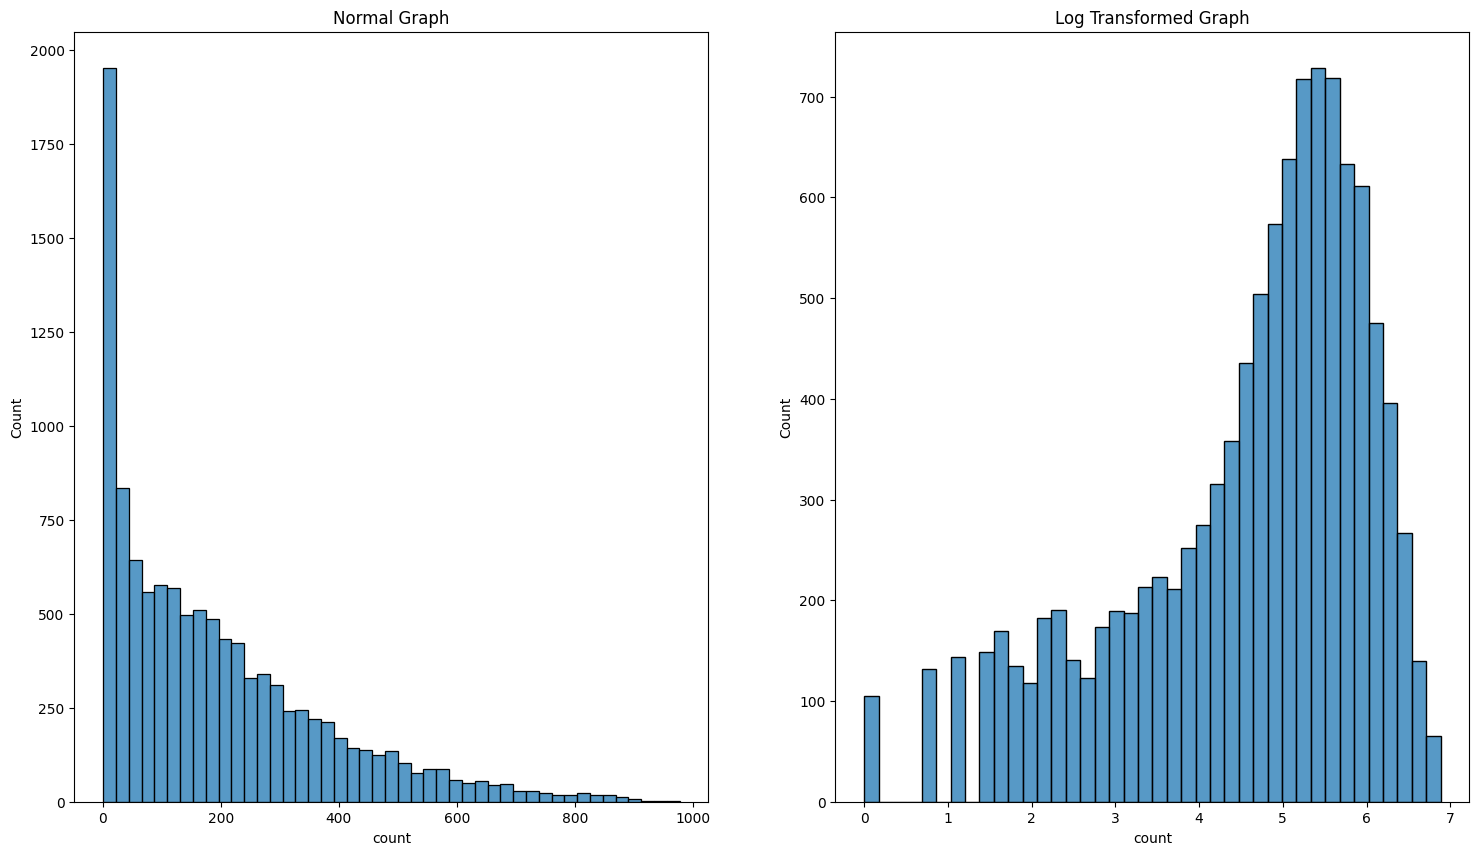

In [11]:
# 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 10))
sns.histplot(temp_df['count'], ax = ax[0])
ax[0].set_title('Normal Graph')
sns.histplot(np.log(temp_df['count']), ax = ax[1]) 
ax[1].set_title('Log Transformed Graph')

plt.show()

- 연도, 월, 요일, 시간대별 이용자수 막대 그래프 작성하기 

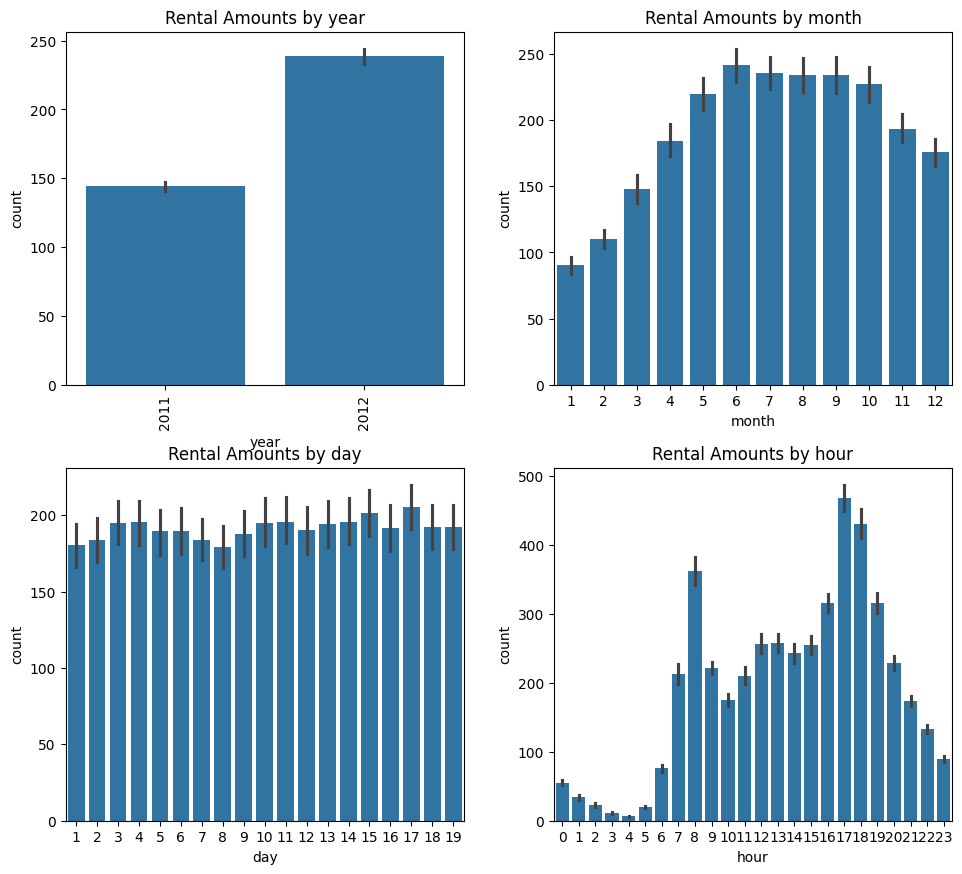

In [12]:
# 
fig, ax = plt.subplots(nrows = 2, ncols = 2)

# 1단계 : 전체 그래프 기본 설정
fig.tight_layout()

# 전체 그래프 사이즈 관리
fig.set_size_inches(10, 9)

## 2단계
sns.barplot(x = 'year', y = 'count', data = temp_df, ax = ax[0,0])
sns.barplot(x = 'month', y = 'count', data = temp_df, ax = ax[0,1])
sns.barplot(x = 'day', y = 'count', data = temp_df, ax = ax[1,0])
sns.barplot(x = 'hour', y = 'count', data = temp_df, ax = ax[1,1])

## 3단계
ax[0, 0].set_title('Rental Amounts by year')
ax[0, 1].set_title('Rental Amounts by month')
ax[1, 0].set_title('Rental Amounts by day')
ax[1, 1].set_title('Rental Amounts by hour')

## 추가 옵션
ax[0, 0].tick_params(axis = 'x', labelrotation = 90)
plt.show()

- 이번에는 각 범주형 데이터셋의 박스플롯 그래프를 작성한다. 

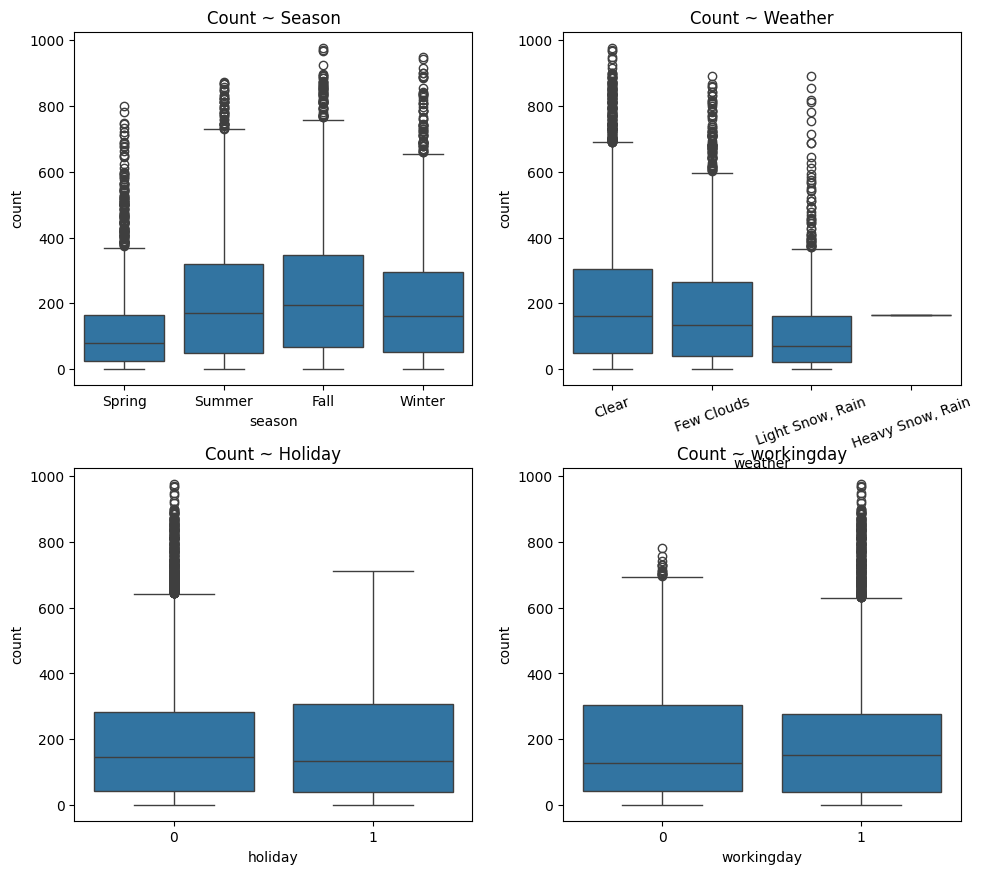

In [13]:
# 
fig, ax = plt.subplots(nrows = 2, ncols = 2)

# 1단계 : 전체 그래프 기본 설정
fig.tight_layout()

# 전체 그래프 사이즈 관리
fig.set_size_inches(10, 9)

## 2단계
sns.boxplot(x = 'season', y = 'count', data = temp_df, ax = ax[0,0])
sns.boxplot(x = 'weather', y = 'count', data = temp_df, ax = ax[0,1])
sns.boxplot(x = 'holiday', y = 'count', data = temp_df, ax = ax[1,0])
sns.boxplot(x = 'workingday', y = 'count', data = temp_df, ax = ax[1,1])

## 3단계
ax[0, 0].set_title('Count ~ Season')
ax[0, 1].set_title('Count ~ Weather')
ax[1, 0].set_title('Count ~ Holiday')
ax[1, 1].set_title('Count ~ workingday')

## 추가 옵션
ax[0, 1].tick_params(axis = 'x', labelrotation = 20)
plt.show()

- 시간 단위의 포인트 플롯을 작성해본다. 
- weather 시각화를 보면, 

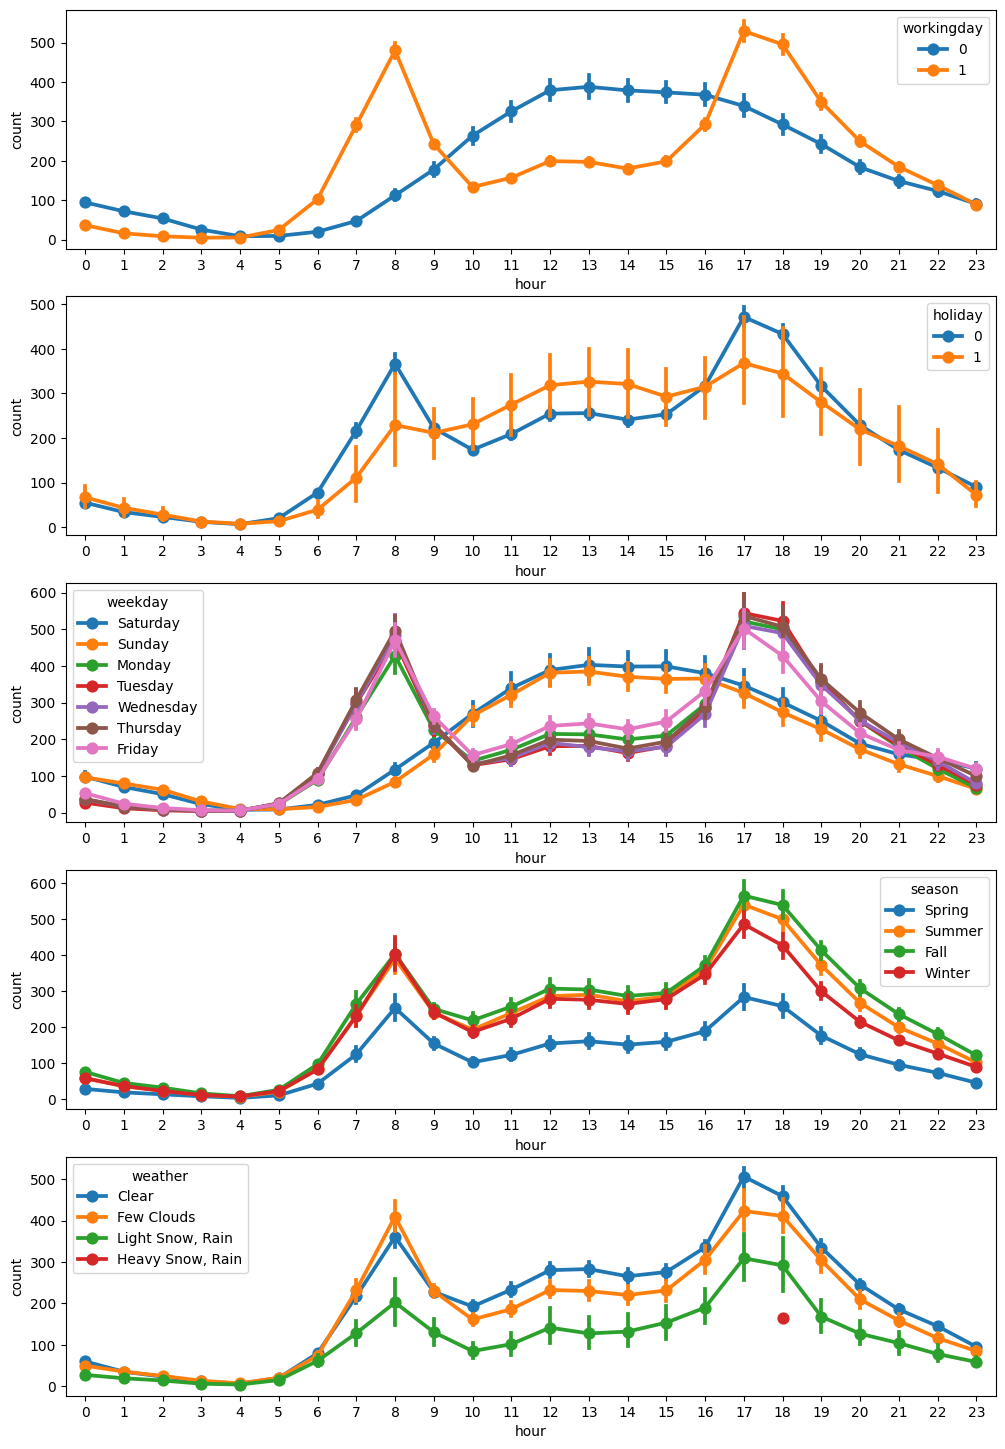

In [14]:
# 
fig, ax = plt.subplots(nrows = 5)
fig.set_size_inches(12, 18)

sns.pointplot(x = 'hour', y = 'count', hue = 'workingday', data= temp_df, ax = ax[0])
sns.pointplot(x = 'hour', y = 'count', hue = 'holiday', data= temp_df, ax = ax[1])
sns.pointplot(x = 'hour', y = 'count', hue = 'weekday', data= temp_df, ax = ax[2])
sns.pointplot(x = 'hour', y = 'count', hue = 'season', data= temp_df, ax = ax[3])
sns.pointplot(x = 'hour', y = 'count', hue = 'weather', data= temp_df, ax = ax[4])

plt.show()

- 회귀선을 포함한 산점도 그래프를 작성해본다. 
- 이 때, x,y 모두 수치형 그래프여야 한다. 
- windspeed 값을 보면 0값이 존재하는데, 이를 추후에 처리할 예정이다. 

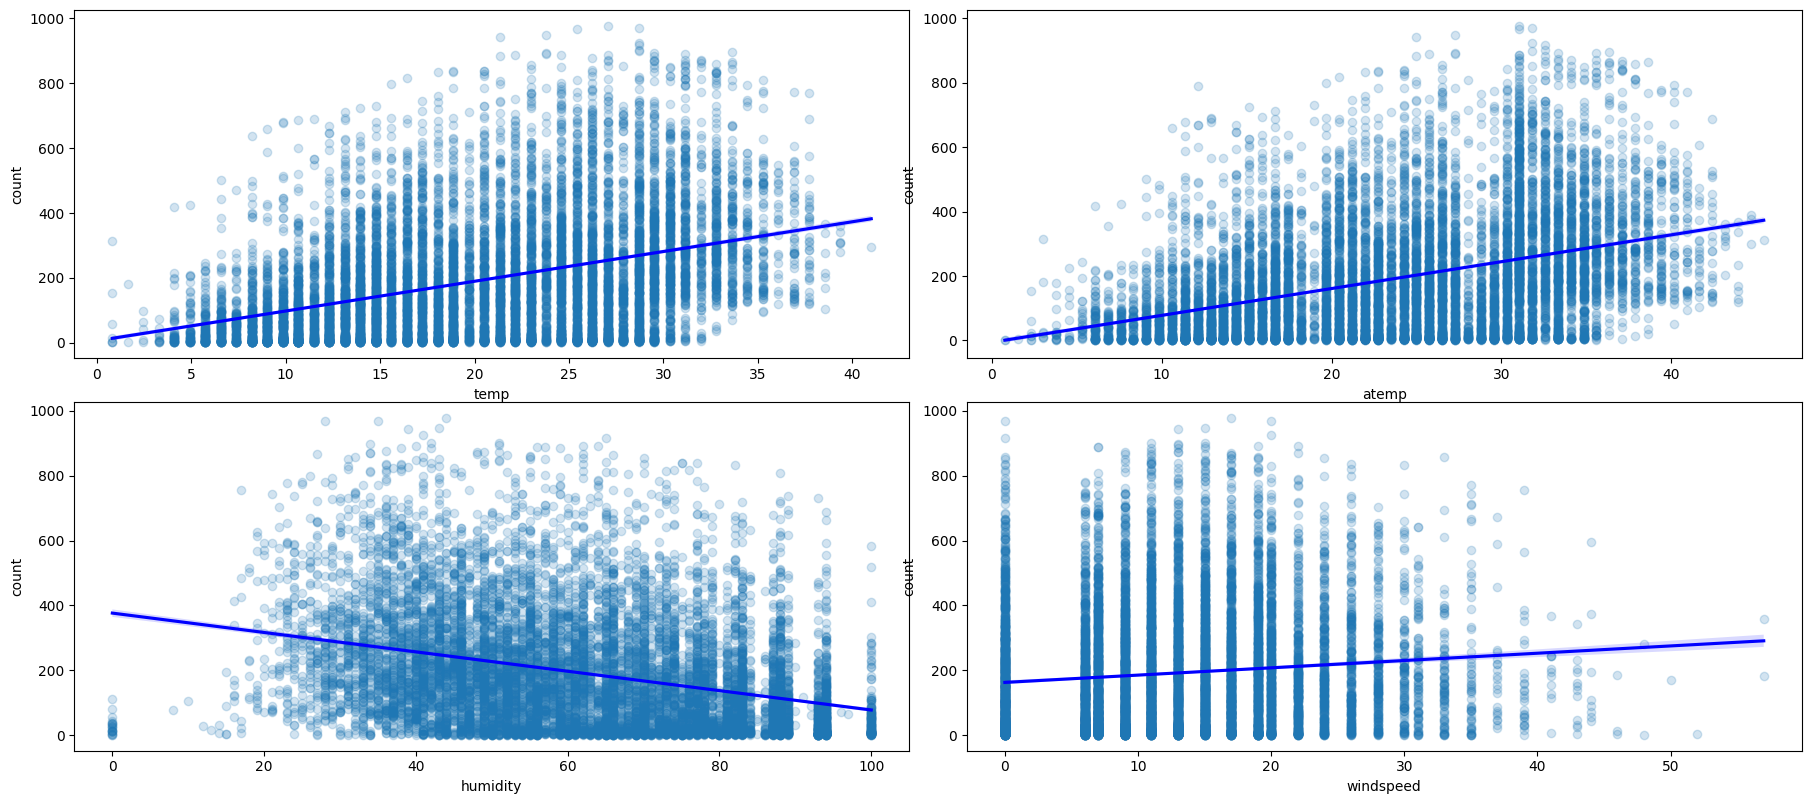

In [15]:
# 
alpha_val = {'alpha': 0.2}
color_val = {'color': 'blue'}

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(18, 8))
fig.tight_layout()

sns.regplot(x = 'temp', y = 'count', data = temp_df, scatter_kws = alpha_val, line_kws = color_val, ax = ax[0, 0])
sns.regplot(x = 'atemp', y = 'count', data = temp_df, scatter_kws = alpha_val, line_kws = color_val, ax = ax[0, 1])
sns.regplot(x = 'humidity', y = 'count', data = temp_df, scatter_kws = alpha_val, line_kws = color_val, ax = ax[1, 0])
sns.regplot(x = 'windspeed', y = 'count', data = temp_df, scatter_kws = alpha_val, line_kws = color_val, ax = ax[1, 1])

plt.show()

- 마지막으로 heatmap을 그려본다. 

In [16]:
# 
corrMat = temp_df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
corrMat

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


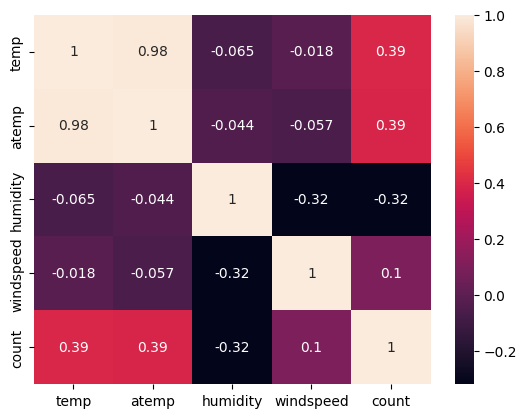

In [17]:
# 
sns.heatmap(corrMat, annot=True)
plt.show()

## 데이터 전처리
- 데이터 전처리를 진행한다. 
- 이상치 제거 : weather가 4인 데이터는 제거 

In [18]:
#
train_df.shape

(10886, 12)

In [19]:
train_df = train_df[train_df['weather'] != 4]

In [20]:
train_df.shape

(10885, 12)

## 데이터 합치기
- 훈련 데이터를 모두 합친다. 

In [22]:
# 
y = train_df['count'] #타깃값
train_df = train_df.drop(['count'], axis = 1)
train_df.shape, test.shape

((10885, 11), (6493, 9))

In [25]:
all_df = pd.concat([train_df, test])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17378 entries, 0 to 6492
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17378 non-null  object 
 1   season      17378 non-null  int64  
 2   holiday     17378 non-null  int64  
 3   workingday  17378 non-null  int64  
 4   weather     17378 non-null  int64  
 5   temp        17378 non-null  float64
 6   atemp       17378 non-null  float64
 7   humidity    17378 non-null  int64  
 8   windspeed   17378 non-null  float64
 9   casual      10885 non-null  float64
 10  registered  10885 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.6+ MB


- 피처 데이터 추가

In [27]:
# 
all_df['date'] = pd.to_datetime(all_df['datetime'])
all_df['year'] = all_df['date'].dt.year
all_df['month'] = all_df['date'].dt.month
all_df['day'] = all_df['date'].dt.day
all_df['hour'] = all_df['date'].dt.hour

all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17378 entries, 0 to 6492
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17378 non-null  object        
 1   season      17378 non-null  int64         
 2   holiday     17378 non-null  int64         
 3   workingday  17378 non-null  int64         
 4   weather     17378 non-null  int64         
 5   temp        17378 non-null  float64       
 6   atemp       17378 non-null  float64       
 7   humidity    17378 non-null  int64         
 8   windspeed   17378 non-null  float64       
 9   casual      10885 non-null  float64       
 10  registered  10885 non-null  float64       
 11  date        17378 non-null  datetime64[ns]
 12  year        17378 non-null  int32         
 13  month       17378 non-null  int32         
 14  day         17378 non-null  int32         
 15  hour        17378 non-null  int32         
dtypes: datetime64[ns](1), float6

- 불필요한 피처 제거

In [35]:
# 
del_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month', 'day']

all_df = all_df.drop(del_features, axis = 1)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17378 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17378 non-null  int64  
 1   holiday     17378 non-null  int64  
 2   workingday  17378 non-null  int64  
 3   weather     17378 non-null  int64  
 4   temp        17378 non-null  float64
 5   atemp       17378 non-null  float64
 6   humidity    17378 non-null  int64  
 7   year        17378 non-null  int32  
 8   hour        17378 non-null  int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 1.2 MB


## 데이터텟 나누기
- 훈련 데이터와 테스트 데이터로 나눈다. 

In [36]:
# 
train = all_df.iloc[0: len(y), :]
test = all_df.iloc[len(y):, :]

train.shape, test.shape

((10885, 9), (6493, 9))

In [37]:
# 
X_train, X_valid, y_train, y_valid, = train_test_split(train, y, test_size = 0.3, shuffle = True, random_state = 42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((7619, 9), (3266, 9), (7619,), (3266,))

## 평가지표 계산 함수 작성
- exp() : 지수변환
- np.nan_to_num() : NaN 결측값을 모두 0으로 바꾸는 기능
- np.log(y+1)은 np.log1p(y)로 표현 가능

In [38]:
# 
def rmsle(y, y_,convertExp=True):

    #지수변환
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)

    # 로그변환 후 결측값을 0으로 변환
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 + log2) ** 2
    return np.sqrt(np.mean(calc))

## 모델 훈련

In [39]:
# 
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
log_y = np.log(y_train)
lr_model.fit(X_train, log_y)

LinearRegression()

## 모델 성능 검증

In [40]:
# 
preds = lr_model.predict(X_train)

# 선형회귀 값
print(rmsle(log_y, preds, True))

9.416767868491721


## 예측 결과 및 제출

In [41]:
# 
final_preds = lr_model.predict(test)
submission['count'] = np.exp(final_preds)
submission.to_csv(DATA_PATH + 'submission.csv', index=False)